In [127]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("white")

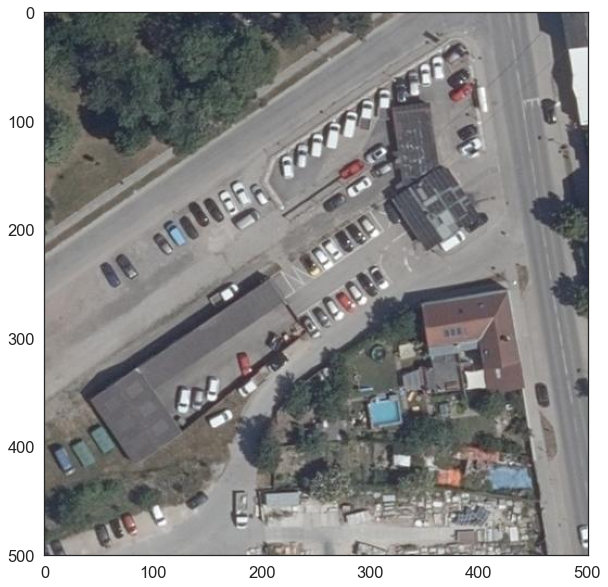

In [128]:

image = Image.open("tilesForFilterTesting/tifclip5.tif")
image_to_np_array = np.array(image)

fig, ax = plt.subplots(figsize=(10,10))

ax.imshow(image)

In [151]:

# Split the three channels
r,g,b = np.split(image_to_np_array,3,axis=2)
#Coverting into 1-D arrays
r=r.reshape(-1)
g=g.reshape(-1)
b=b.reshape(-1)



Extract whiteLines

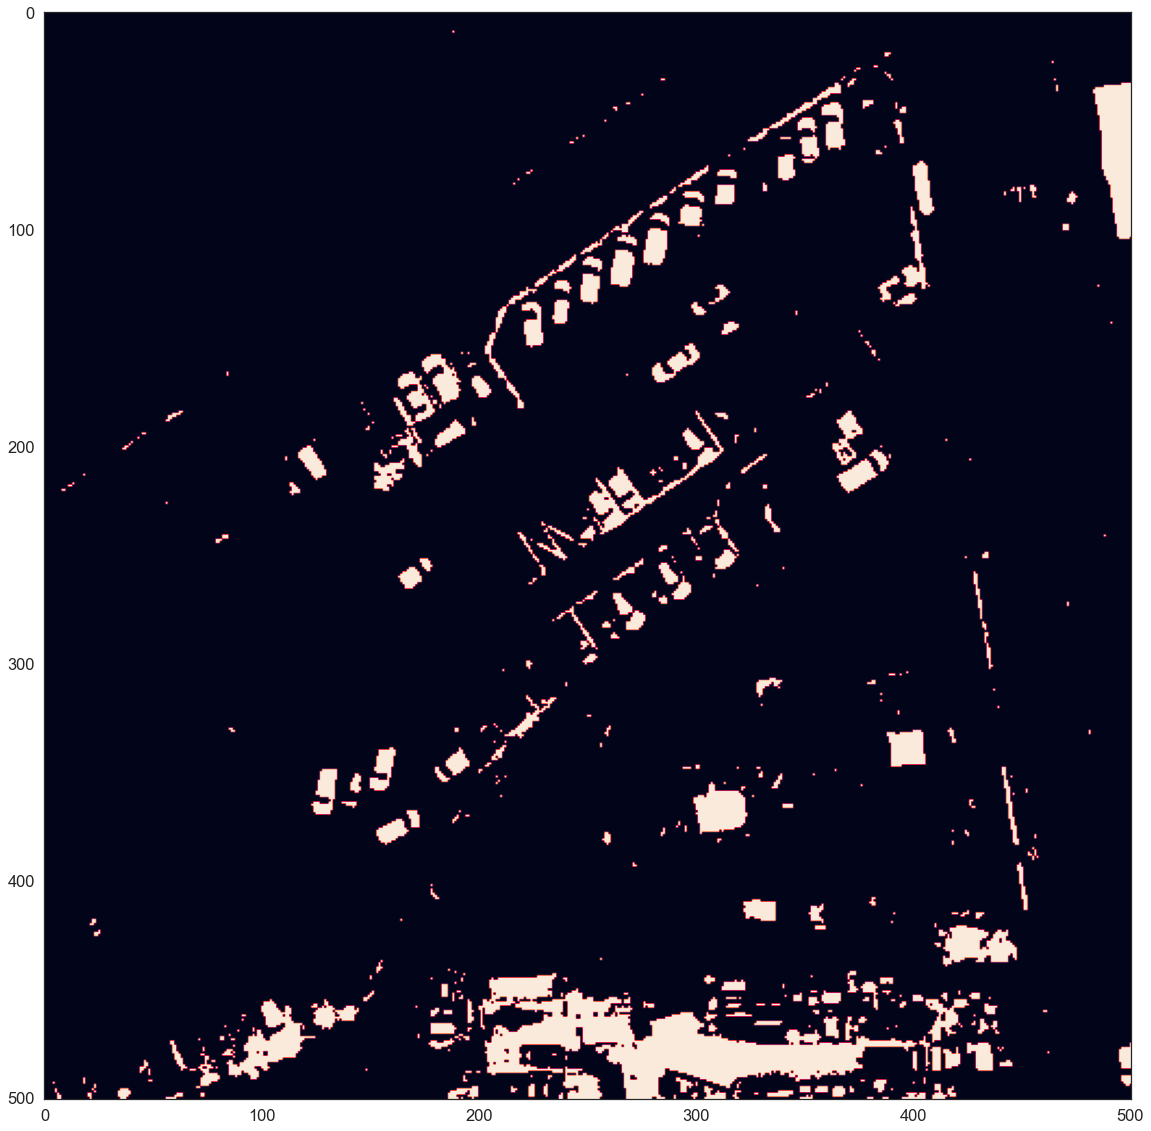

In [168]:
# Standard RGB to grayscale 
bitmap = list(map(lambda x:x[2], zip(r,g,b)))
bitmap = np.array(bitmap).reshape([image_to_np_array.shape[0], image_to_np_array.shape[1]])
bitmap = np.dot((bitmap > 170).astype(float),255)
im = Image.fromarray(bitmap.astype(np.uint8))
fig, ax = plt.subplots(figsize =(20,20))
ax.imshow(im)
im.save('imagesProcessedByFilters/last.tif')

Read image pixel by pixel, manual filters

C:\Users\jcarvajal\AppData\Local\Temp\ipykernel_10620\3606757035.py:14: RuntimeWarning: overflow encountered in ubyte_scalars
  gray_filter =(r[c]+ g[c]+ b[c])//3


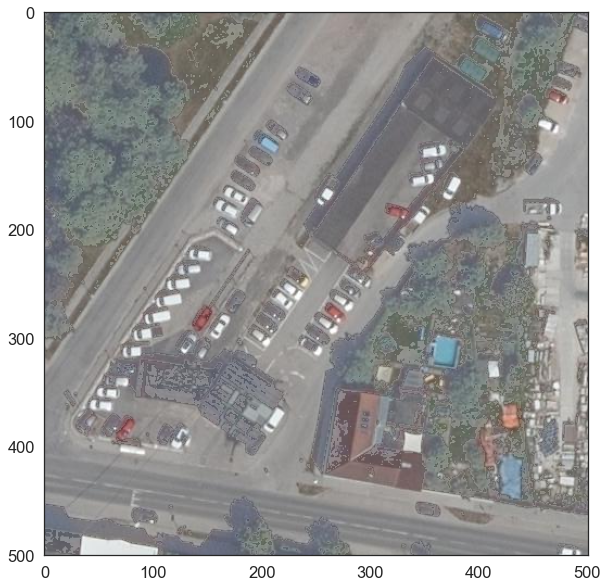

In [219]:

img = Image.open("tilesForFilterTesting/tifclip5.tif") # Create a new black image
image_to_np_array = np.array(image)
r,g,b = np.split(image_to_np_array,3,axis=2)
#Coverting into 1-D arrays
r=r.reshape(-1)
g=g.reshape(-1)
b=b.reshape(-1)
c =0
pixels = img.load() # Create the pixel map
brightness=+50
black_umbral = 100
for i in range(img.size[1]):    # For every pixel:
    for j in range(img.size[0]):
        gray_filter =(r[c]+ g[c]+ b[c])//3
        #pixels[i,j] = (gray_filter,gray_filter,gray_filter)
        #pixels[i,j] = (r[c]+brightness, g[c]+brightness, b[c]+brightness)
        if(r[c]<black_umbral and g[c]<black_umbral and b[c]<black_umbral):
            #print(pixels[i,j])
            pixels[i,j] = (r[c]+brightness, g[c]+brightness, b[c]+brightness) # Set the colour accordingly
        else:
            pixels[i,j] = (r[c], g[c], b[c]) # Set the colour accordingly

        c=c+1
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img)
img.save("imagesProcessedByFilters/delteShadows.tif")

Delete shadows

In [215]:
import cv2
import numpy as np

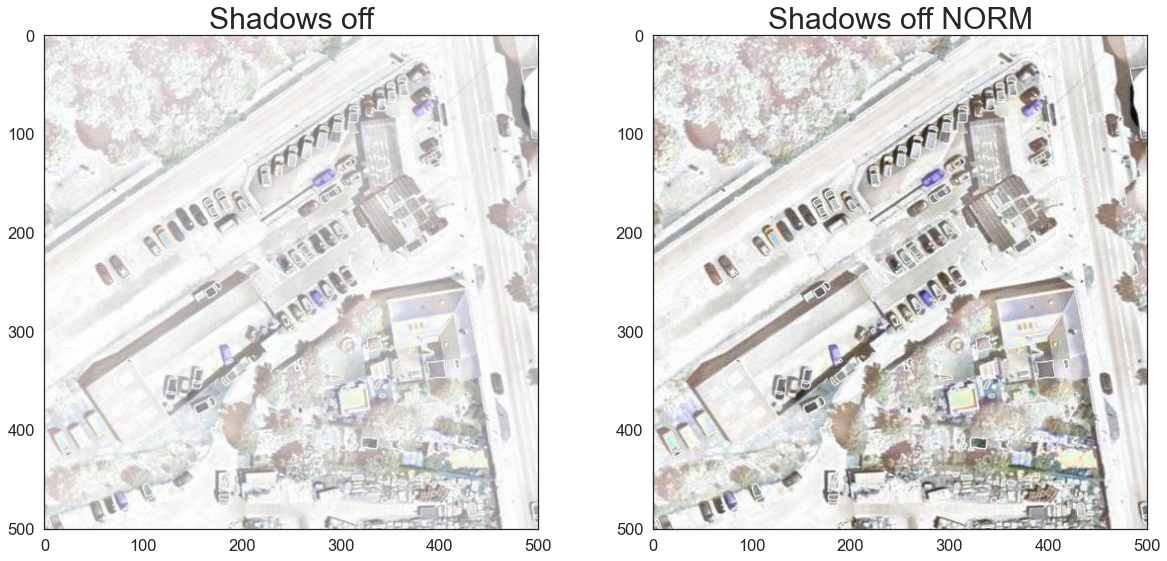

In [242]:


img = cv2.imread("tilesForFilterTesting/tifclip5.tif", -1)

rgb_planes = cv2.split(img)

result_planes = []
result_norm_planes = []
for plane in rgb_planes:
    dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 47)
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    norm_img = cv2.normalize(diff_img,None, alpha=5, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    result_planes.append(diff_img)
    result_norm_planes.append(norm_img)

result = cv2.merge(result_planes)
result_norm = cv2.merge(result_norm_planes)

plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.title('Shadows off',fontsize = 30)
plt.imshow(result)
plt.subplot(222)
plt.title('Shadows off NORM',fontsize = 30)
plt.imshow(result_norm)
#cv2.imwrite('imagesProcessedByFilters/shadows_out.png', result)
#cv2.imwrite('imagesProcessedByFilters/shadows_out_norm.png', result_norm)